In [31]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

In [32]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/16/2016,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,8/17/2016,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,8/18/2016,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,8/19/2016,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,8/22/2016,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...,...
1253,8/9/2021,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,8/10/2021,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,8/11/2021,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,8/12/2021,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


In [33]:
df = df.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
df.head()

,date,open,high,low,close,adj_close,volume
0,8/16/2016,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,8/17/2016,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,8/18/2016,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,8/19/2016,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,8/22/2016,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [34]:
df['date'] = pd.to_datetime(df.date)
df

,date,open,high,low,close,adj_close,volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


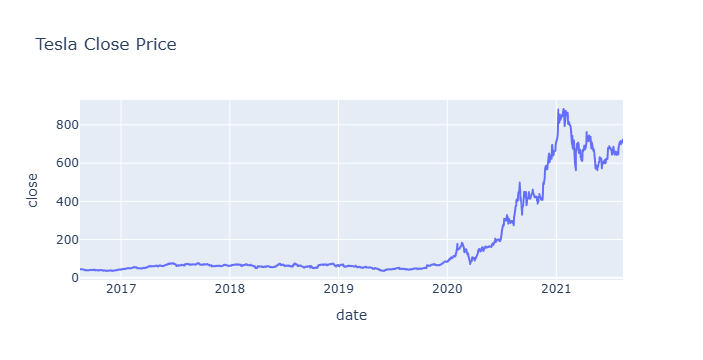

In [35]:
fig= px.line(df, x='date', y='close', title='Tesla Close Price')
fig.show()

In [36]:
closedf = df[['date','close']]
print("Shape of close dataframe:", closedf.shape)
closedf

Shape of close dataframe: (1258, 2)


,date,close
0,2016-08-16,44.722000
1,2016-08-17,44.647999
2,2016-08-18,44.702000
3,2016-08-19,45.000000
4,2016-08-22,44.585999
...,...,...
1253,2021-08-09,713.760010
1254,2021-08-10,709.989990
1255,2021-08-11,707.820007
1256,2021-08-12,722.250000


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf['close']).reshape(-1,1))
print(closedf.shape)

(1258, 1)


In [39]:
closedf

array([[0.01053705],
       [0.01044971],
       [0.01051345],
       ...,
       [0.79314193],
       [0.81017257],
       [0.80417701]])

In [40]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (880, 1)
test_data:  (378, 1)


In [41]:
train_data

array([[0.01053705],
       [0.01044971],
       [0.01051345],
       [0.01086515],
       [0.01037654],
       [0.01082738],
       [0.01030336],
       [0.00991153],
       [0.00968257],
       [0.00855191],
       [0.00764078],
       [0.00779893],
       [0.00514578],
       [0.00444001],
       [0.00563204],
       [0.00536766],
       [0.00434087],
       [0.0036587 ],
       [0.00456275],
       [0.00403165],
       [0.00411663],
       [0.00506317],
       [0.00623867],
       [0.00646056],
       [0.00605928],
       [0.00619618],
       [0.0064818 ],
       [0.00672257],
       [0.00708607],
       [0.00633545],
       [0.00644403],
       [0.00512926],
       [0.00591529],
       [0.00819785],
       [0.0076573 ],
       [0.00696097],
       [0.00520007],
       [0.00416383],
       [0.00518827],
       [0.00498763],
       [0.00532045],
       [0.00502068],
       [0.00414023],
       [0.00353832],
       [0.00475159],
       [0.00580435],
       [0.00475159],
       [0.004

In [42]:
test_data


array([[0.14659811],
       [0.16037605],
       [0.17430743],
       [0.17005627],
       [0.17043158],
       [0.15456699],
       [0.14656978],
       [0.14158687],
       [0.11802959],
       [0.11543074],
       [0.13328282],
       [0.13372895],
       [0.13467075],
       [0.12877908],
       [0.12380797],
       [0.10127039],
       [0.11008195],
       [0.10746185],
       [0.09007006],
       [0.08678195],
       [0.06281158],
       [0.05930159],
       [0.04301921],
       [0.05869731],
       [0.05867135],
       [0.06026702],
       [0.07695776],
       [0.0850423 ],
       [0.08242456],
       [0.07916714],
       [0.07628031],
       [0.08144261],
       [0.07142486],
       [0.0650304 ],
       [0.07105899],
       [0.0796109 ],
       [0.08650577],
       [0.08730597],
       [0.09300881],
       [0.11140853],
       [0.12532101],
       [0.13002776],
       [0.13365814],
       [0.135707  ],
       [0.13392958],
       [0.11985185],
       [0.13056593],
       [0.124

In [43]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (864, 15)
y_train:  (864,)
X_test:  (362, 15)
y_test (362,)


In [51]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [58]:
prediction = my_model.predict(X_test)
print(prediction)

[0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.1380129
 0.1380129  0.1380129  0.1380129  0.13773745 0.13301593 0.12033629
 0.12010534 0.12010534 0.11305962 0.12243088 0.12512504 0.10182939
 0.12606806 0.07919183 0.07369824 0.08123419 0.07469895 0.09232655
 0.09317391 0.09510011 0.14868411 0.16195405 0.13094242 0.10705775
 0.12718783 0.105884   0.11048456 0.11048456 0.1340185  0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974
 0.13993974 0.13993974 0.13993974 0.13993974 0.13993974 0.13993

In [59]:
print(y_test)

[0.10127039 0.11008195 0.10746185 0.09007006 0.08678195 0.06281158
 0.05930159 0.04301921 0.05869731 0.05867135 0.06026702 0.07695776
 0.0850423  0.08242456 0.07916714 0.07628031 0.08144261 0.07142486
 0.0650304  0.07105899 0.0796109  0.08650577 0.08730597 0.09300881
 0.11140853 0.12532101 0.13002776 0.13365814 0.135707   0.13392958
 0.11985185 0.13056593 0.12431547 0.12892306 0.14629598 0.13930197
 0.14671142 0.14231391 0.12329812 0.13743014 0.13908716 0.14247914
 0.14187957 0.15117503 0.14925598 0.14881222 0.14445719 0.14737706
 0.14639512 0.14980833 0.14848176 0.15026389 0.15310588 0.15057548
 0.15104521 0.15136623 0.14796246 0.15485261 0.16974704 0.16584286
 0.16617332 0.16178762 0.16681065 0.1819789  0.17979549 0.19971296
 0.18738905 0.1785232  0.19165202 0.18958191 0.19186211 0.19473478
 0.19401247 0.1924593  0.1942202  0.18455887 0.19049068 0.18429686
 0.19600705 0.2126388  0.2220381  0.24305318 0.28150965 0.28582453
 0.28016418 0.28686785 0.32236194 0.31112855 0.31578808 0.3226

In [60]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.3950602313573974
Root Mean squared Error - RMSE : 0.4724686100822084
